## Regression Models Webinar

5th August 2019

Robert Manriquez

Emeritus Columbia ADS

Updated 6th August 2019
* Notes:
    * Corrections on RMSE per model results
    * Added plots for alphas vs. coefficients

#### Objectives:
* Overview: Linear Regression
* Introduce the Ames, Iowa dataset
* Perform basic Exploratory Data Analysis (EDA)
* Choose features, prototype with linear regression models.
    - Linear Regression
    - Regression with Regularization (Lasso, Ridge)
* Evaluate models
    - Train vs test set accuracy
    - R^2 Accuracy
    - Mean Error metrics (MAE, MSE, RMSE)

## Overview: Linear Regresssion

* Linear Regression is the simplest approach to a machine learning model. 
* Documentation at https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    - By default is a multiple linear regression model via Ordinary Least Squares
* How does it work?
    - Computes the equation below! (classic $Y = m_1X_1+m_2X_2+...+m_nX_n + b$ form)
    - Adjusts the weights of the equation iteratively until the error term is minimized!
 

## $$Y = \beta_0 + \beta_1 X_1  + \beta_2 X_2 + ... + \beta_n X_n  + \epsilon$$

Where:

$ X_1 ... X_n $  : independent variables (our "features" or "columns" from the data set)

$ \beta_1 ... \beta_n $  : coefficiencts of independant variables ("weights" of our features)

$ \beta_0 $   : slope intercept from the linear equation

$ \epsilon $  : the error term the model training process tries to "minimize" (also referred to as the "cost function")

$ Y $   : The dependent variable (our "target" variable we want to predict)

* Note:  In most ML texts, this is the typical notation rather than m's.  Sometimes it's w's.

<a id="evaluation-metrics-for-regression-problems"></a>
### Evaluation Metrics for Regression

* R^2 Accuracy is somewhat a _normalized_ view of the sums of all errors per prediction.
    - OK to use for general model training (gauging overall performance, checking for overfitting), but not interpretable for a continuous value!

The most appropriate metrics are:

**Mean Absolute Error (MAE)**:

### $\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$

**Mean Squared Error (MSE)**:

### $\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$

**Root Mean Squared error (RMSE)**:

### $\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$


* We'll be using RMSE mostly, since it's the closest in scale and units of the target variable.
    - Interpret as "for every prediction I make, I can expect the value to be this amount over or under the real value."
    - Somewhat of a relative value, best for comparing models between each other.
    - The closer to 0, the better.

## Intro: The Ames, Iowa Dataset

* Data on homes sold in Iowa from 2006 - 2010.
* 2930 rows, 80 variables
* Classic dataset for DS practice (original paper at http://jse.amstat.org/v19n3/decock.pdf)


* *Goal*: Use this data to prototype a regression model for predicting the sale price of a home.

    - Has many "interpretable" features perfect for this approach, such as:
        - Number of bedrooms and bathrooms.
        - Home size (number of floors, inside square footage, lot square footage)
        
    - Also has an exhaustive, granular categorical and ordinal features
        - Building class, zoning, name of neighborhood, type of masonry, type of roofing.
        - Has a pool?  Has fire place?  Quality of fences? What shape is the lot?

### File descriptions (from Kaggle page)
<ul>
<li><strong>train.csv</strong> - the training set</li>
<li><strong>test.csv</strong> - the test set</li>
<li><strong>data_description.txt</strong> - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here</li>
<li><strong>sample_submission.csv</strong> - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms</li>
</ul>

### The Dataset: Ames, Iowa Housing Prices

<p>Data Dictionary:</p>
<ul>
<li><strong>SalePrice</strong> - the property's sale price in dollars. This is the target variable that you're trying to predict.</li>
<li><strong>MSSubClass</strong>: The building class</li>
<li><strong>MSZoning</strong>: The general zoning classification</li>
<li><strong>LotFrontage</strong>: Linear feet of street connected to property</li>
<li><strong>LotArea</strong>: Lot size in square feet</li>
<li><strong>Street</strong>: Type of road access</li>
<li><strong>Alley</strong>: Type of alley access</li>
<li><strong>LotShape</strong>: General shape of property</li>
<li><strong>LandContour</strong>: Flatness of the property</li>
<li><strong>Utilities</strong>: Type of utilities available</li>
<li><strong>LotConfig</strong>: Lot configuration</li>
<li><strong>LandSlope</strong>: Slope of property</li>
<li><strong>Neighborhood</strong>: Physical locations within Ames city limits</li>
<li><strong>Condition1</strong>: Proximity to main road or railroad</li>
<li><strong>Condition2</strong>: Proximity to main road or railroad (if a second is present)</li>
<li><strong>BldgType</strong>: Type of dwelling</li>
<li><strong>HouseStyle</strong>: Style of dwelling</li>
<li><strong>OverallQual</strong>: Overall material and finish quality</li>
<li><strong>OverallCond</strong>: Overall condition rating</li>
<li><strong>YearBuilt</strong>: Original construction date</li>
<li><strong>YearRemodAdd</strong>: Remodel date</li>
<li><strong>RoofStyle</strong>: Type of roof</li>
<li><strong>RoofMatl</strong>: Roof material</li>
<li><strong>Exterior1st</strong>: Exterior covering on house</li>
<li><strong>Exterior2nd</strong>: Exterior covering on house (if more than one material)</li>
<li><strong>MasVnrType</strong>: Masonry veneer type</li>
<li><strong>MasVnrArea</strong>: Masonry veneer area in square feet</li>
<li><strong>ExterQual</strong>: Exterior material quality</li>
<li><strong>ExterCond</strong>: Present condition of the material on the exterior</li>
<li><strong>Foundation</strong>: Type of foundation</li>
<li><strong>BsmtQual</strong>: Height of the basement</li>
<li><strong>BsmtCond</strong>: General condition of the basement</li>
<li><strong>BsmtExposure</strong>: Walkout or garden level basement walls</li>
<li><strong>BsmtFinType1</strong>: Quality of basement finished area</li>
<li><strong>BsmtFinSF1</strong>: Type 1 finished square feet</li>
<li><strong>BsmtFinType2</strong>: Quality of second finished area (if present)</li>
<li><strong>BsmtFinSF2</strong>: Type 2 finished square feet</li>
<li><strong>BsmtUnfSF</strong>: Unfinished square feet of basement area</li>
<li><strong>TotalBsmtSF</strong>: Total square feet of basement area</li>
<li><strong>Heating</strong>: Type of heating</li>
<li><strong>HeatingQC</strong>: Heating quality and condition</li>
<li><strong>CentralAir</strong>: Central air conditioning</li>
<li><strong>Electrical</strong>: Electrical system</li>
<li><strong>1stFlrSF</strong>: First Floor square feet</li>
<li><strong>2ndFlrSF</strong>: Second floor square feet</li>
<li><strong>LowQualFinSF</strong>: Low quality finished square feet (all floors)</li>
<li><strong>GrLivArea</strong>: Above grade (ground) living area square feet</li>
<li><strong>BsmtFullBath</strong>: Basement full bathrooms</li>
<li><strong>BsmtHalfBath</strong>: Basement half bathrooms</li>
<li><strong>FullBath</strong>: Full bathrooms above grade</li>
<li><strong>HalfBath</strong>: Half baths above grade</li>
<li><strong>Bedroom</strong>: Number of bedrooms above basement level</li>
<li><strong>Kitchen</strong>: Number of kitchens</li>
<li><strong>KitchenQual</strong>: Kitchen quality</li>
<li><strong>TotRmsAbvGrd</strong>: Total rooms above grade (does not include bathrooms)</li>
<li><strong>Functional</strong>: Home functionality rating</li>
<li><strong>Fireplaces</strong>: Number of fireplaces</li>
<li><strong>FireplaceQu</strong>: Fireplace quality</li>
<li><strong>GarageType</strong>: Garage location</li>
<li><strong>GarageYrBlt</strong>: Year garage was built</li>
<li><strong>GarageFinish</strong>: Interior finish of the garage</li>
<li><strong>GarageCars</strong>: Size of garage in car capacity</li>
<li><strong>GarageArea</strong>: Size of garage in square feet</li>
<li><strong>GarageQual</strong>: Garage quality</li>
<li><strong>GarageCond</strong>: Garage condition</li>
<li><strong>PavedDrive</strong>: Paved driveway</li>
<li><strong>WoodDeckSF</strong>: Wood deck area in square feet</li>
<li><strong>OpenPorchSF</strong>: Open porch area in square feet</li>
<li><strong>EnclosedPorch</strong>: Enclosed porch area in square feet</li>
<li><strong>3SsnPorch</strong>: Three season porch area in square feet</li>
<li><strong>ScreenPorch</strong>: Screen porch area in square feet</li>
<li><strong>PoolArea</strong>: Pool area in square feet</li>
<li><strong>PoolQC</strong>: Pool quality</li>
<li><strong>Fence</strong>: Fence quality</li>
<li><strong>MiscFeature</strong>: Miscellaneous feature not covered in other categories</li>
<li><strong>MiscVal</strong>: $Value of miscellaneous feature</li>
<li><strong>MoSold</strong>: Month Sold</li>
<li><strong>YrSold</strong>: Year Sold</li>
<li><strong>SaleType</strong>: Type of sale</li>
<li><strong>SaleCondition</strong>: Condition of sale</li>
</ul></div>

### Part I.  EDA

### Our approach:
* Keep it simple!  Choose only a few numeric variables to start with.
    * Can check linear correlations.
    * Pick the top 10 variable most correlated with SalePrice.
* Visualize distrubtions of features and our target variable.
* Clean up the data, plug in to a model.

In [1]:
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
pd.set_option("max.columns", 100)
pd.set_option("display.max_rows", 100)

In [2]:
df = pd.read_csv("./data/train.csv")

In [3]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [4]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [5]:
df.shape

(1460, 81)

In [6]:
df._get_numeric_data().shape

(1460, 38)

In [7]:
df.corr()['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

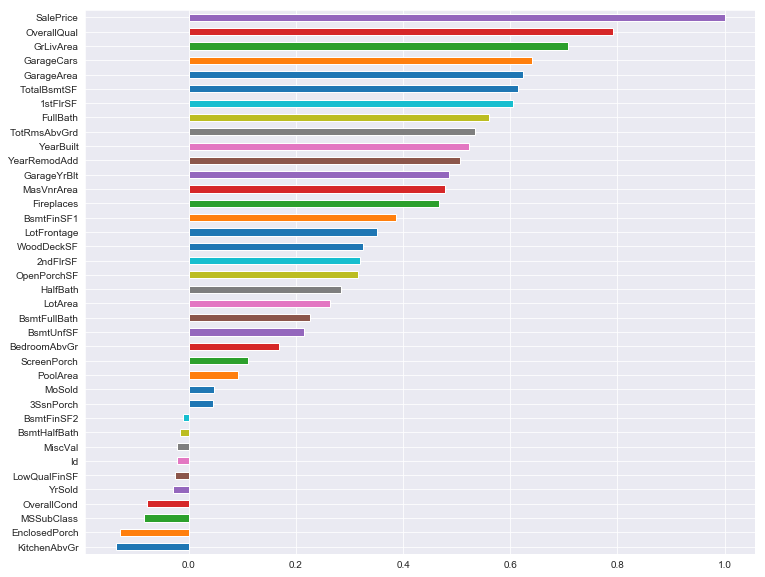

In [8]:
plt.figure(figsize = (12,10))
df.corr()['SalePrice'].sort_values(ascending = True).plot(kind = 'barh')

In [9]:
top_6_w_target = df.corr()['SalePrice'].sort_values(ascending = False).keys()[0:7]

In [10]:
top_6_w_target

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF'],
      dtype='object')

In [11]:
top_6_df = df.loc[:,top_6_w_target].copy()

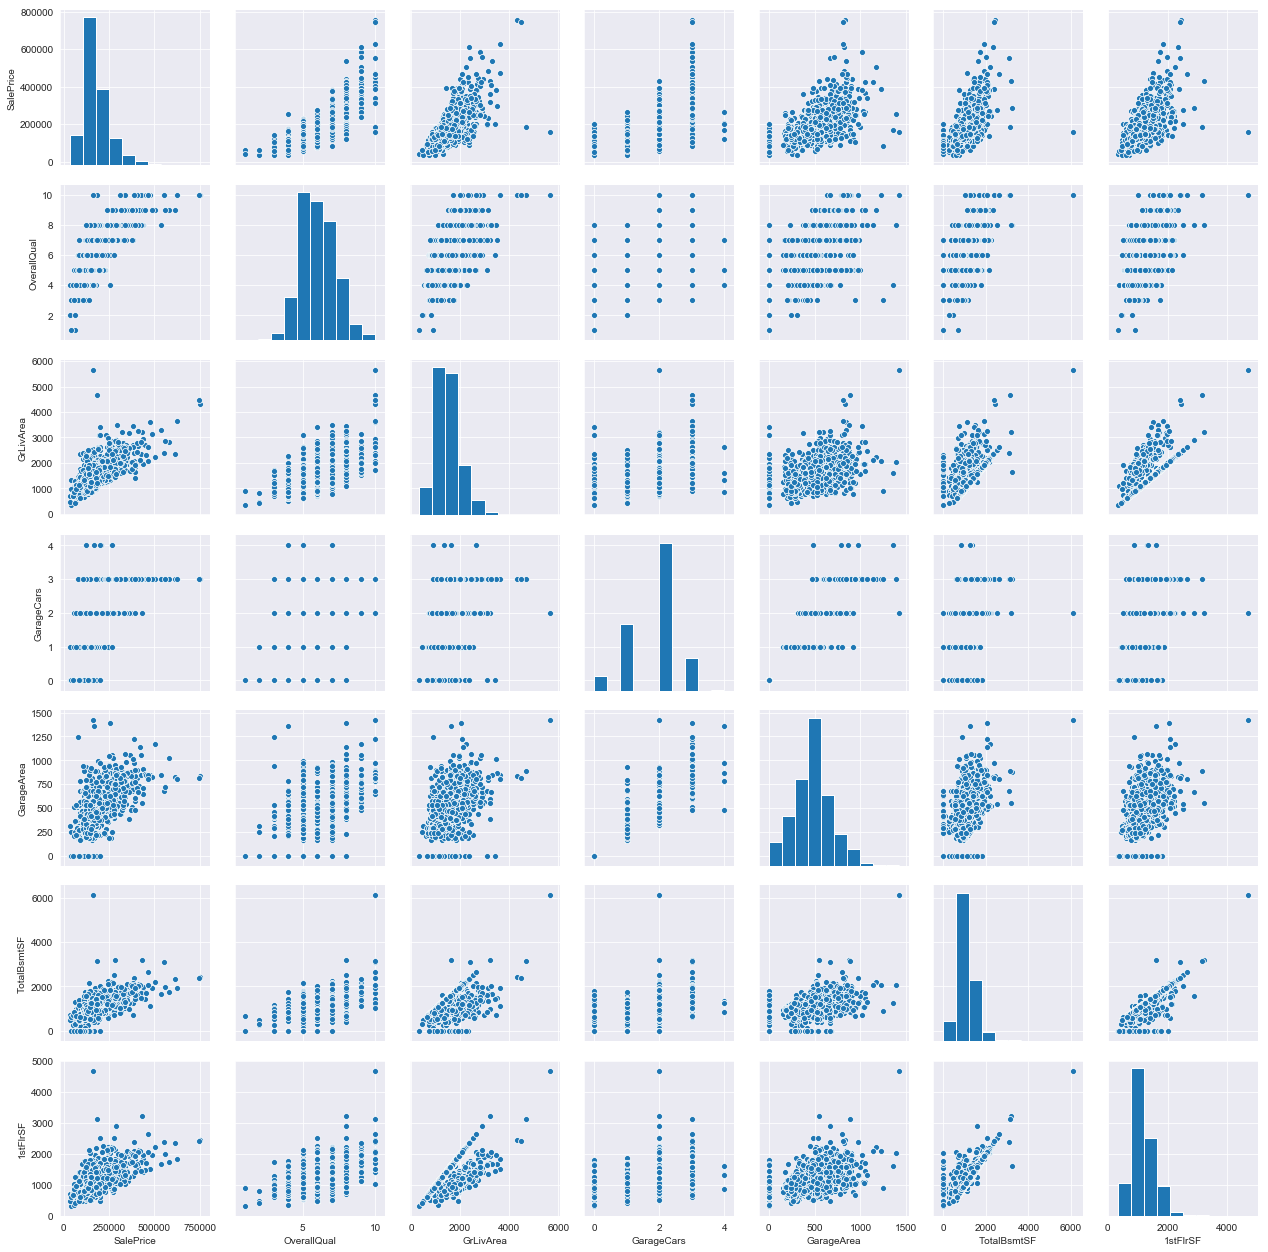

In [12]:
sns.pairplot(top_6_df)

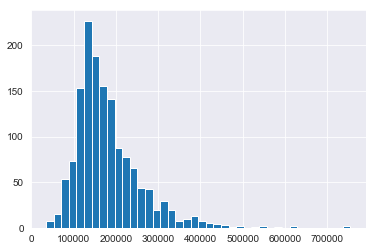

In [13]:
top_6_df['SalePrice'].hist(bins = 40)

In [14]:
top_6_df.describe()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,6.099315,1515.463699,1.767123,472.980137,1057.429452,1162.626712
std,79442.502883,1.382997,525.480383,0.747315,213.804841,438.705324,386.587738
min,34900.000000,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000
25%,129975.000000,5.000000,1129.500000,1.000000,334.500000,795.750000,882.000000
50%,163000.000000,6.000000,1464.000000,2.000000,480.000000,991.500000,1087.000000
75%,214000.000000,7.000000,1776.750000,2.000000,576.000000,1298.250000,1391.250000
max,755000.000000,10.000000,5642.000000,4.000000,1418.000000,6110.000000,4692.000000


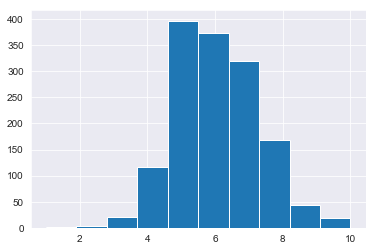

In [15]:
top_6_df['OverallQual'].hist(bins = 10)

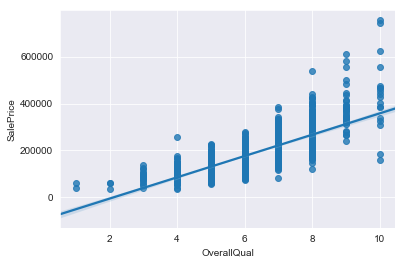

In [16]:
sns.regplot(data = df, x = 'OverallQual', y = 'SalePrice')

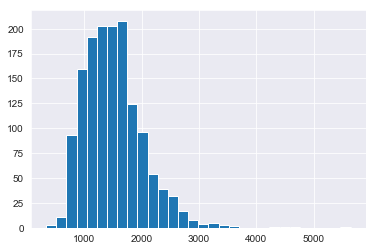

In [17]:
top_6_df['GrLivArea'].hist(bins = 30)

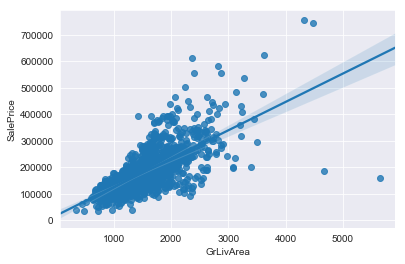

In [18]:
sns.regplot(data = df, x = 'GrLivArea', y = 'SalePrice')

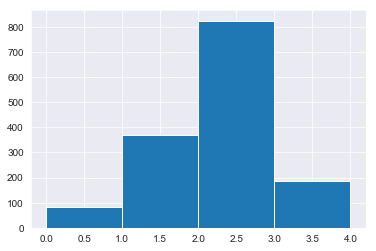

In [19]:
top_6_df['GarageCars'].hist(bins = 4)

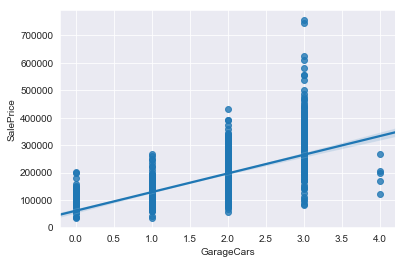

In [20]:
sns.regplot(data = df, x = 'GarageCars', y = 'SalePrice')

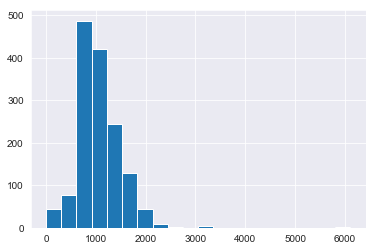

In [21]:
top_6_df['TotalBsmtSF'].hist(bins = 20)

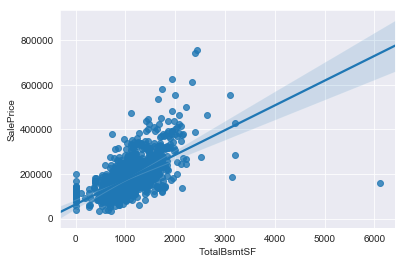

In [22]:
sns.regplot(data = df, x = 'TotalBsmtSF', y = 'SalePrice')

### Part II. Linear Regression Model

* Using only the top 6 features.
* Using only model default settings.
* Simple, preliminary model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [24]:
X = top_6_df.drop('SalePrice', axis = 1)
y = top_6_df['SalePrice']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

linreg = LinearRegression()

## DONT FIT THE TEST DATA!

linreg.fit(X_train, y_train)

y_train_predicted = linreg.predict(X_train)
y_test_predicted = linreg.predict(X_test)

linreg_train_r2 = linreg.score(X_train, y_train)
linreg_test_r2 = linreg.score(X_test, y_test)

print("Training R^2")
print(linreg_train_r2)
print("Test R^2")
print(linreg_test_r2)

linreg_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predicted))
linreg_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predicted))

print("Training RMSE, Test RMSE")
print(linreg_train_rmse, linreg_test_rmse)

Training R^2
0.7632504749539564
Test R^2
0.7546592040484126
Training RMSE, Test RMSE
39456.441622191465 37312.96843897494


In [25]:
X.columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF'],
      dtype='object')

In [26]:
linreg.coef_

array([2.58171301e+04, 3.95693954e+01, 1.71353969e+04, 9.54186850e+00,
       2.23700326e+01, 1.31724444e+01])

In [27]:
result_df = top_6_df.iloc[top_6_df.index.isin(X_train.index),:].copy()
result_df['y_predicted'] = np.round(linreg.predict(X_train))
result_df['y_diff'] = result_df['SalePrice'] - result_df['y_predicted']

In [28]:
result_df.head(20)

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,y_predicted,y_diff
0,208500,7,1710,2,548,856,856,211305.0,-2805.0
1,181500,6,1262,2,460,1262,1262,103808.0,77692.0
2,223500,7,1786,2,608,920,920,201541.0,21959.0
4,250000,8,2198,3,836,1145,1145,184230.0,65770.0
5,143000,5,1362,2,480,796,796,198265.0,-55265.0
6,307000,8,1694,2,636,1686,1694,124283.0,182717.0
9,118000,5,1077,1,205,991,1077,154528.0,-36528.0
10,129500,5,1040,1,384,1040,1040,173044.0,-43544.0
12,144000,5,912,1,352,912,912,143458.0,542.0
13,279500,7,1494,3,840,1494,1494,107752.0,171748.0


* Result:
    * We can assume 70 ~ 80% total overall performance
    * From RMSE, we can expect each prediction we made to off by \\$35,000 - \\$40,000.

### Part III. Lasso and Ridge Regression

Typical linear regression, but adds a "penalty" term to the equation.  These terms will down weight our least important variables and keep only the strongest signals.

**Ridge regression** (or "L2 regularization") minimizes: $$\ \alpha \sum_{j=1}^p \beta_j^2$$

**Lasso regression** (or "L1 regularization") minimizes: $$\ \alpha \sum_{j=1}^p |\beta_j|$$

- $p$ is the number of features.
- $\beta_j$ is a model coefficient.
- $\alpha$ is a tuning parameter:
    - A tiny $\alpha$ imposes no penalty on the coefficient size, and is equivalent to a normal linear regression model.
    - Increasing the $\alpha$ penalizes the coefficients and thus shrinks them.
    
Below is the relationship for different coefficients vs. increasing alpha (regularization strength).
* LASSO regularization, as alpha increases coefficients get reduced to zero.
* Ridge regulatization, as alpha increase coefficients get reduced _closer_ to zero, but never to 0.

![a](./assets/lasso_ridge_path.png)

Sklearn Docs:


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html


http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

In [30]:
## Using the .__get_numeric_data() command to select only the numeric columns
df._get_numeric_data().head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [31]:
# Instead of picking the top variables visually, let's grab ALL of the numeric columns and let the
# model tell us which variables are "important" based on their coefficients

train_df = df._get_numeric_data().copy()

train_df.drop('Id', axis = 1, inplace = True)
train_df.dropna(inplace = True, axis = 0)

X = train_df.drop("SalePrice", axis = 1)
y = train_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

test_alphas = [0.001, 0.01, 0.1, 1, 10, 100, 300, 500, 700, 1000, 10000, 100000]

# Using RidgeCV and LassoCV to tune the alpha hyperparameter.
ridge = RidgeCV(alphas = test_alphas, cv = 3)
lasso = LassoCV(alphas = test_alphas, cv = 3)

# Note:  When using Regularization, it's good practice to scale (normalize) your features
ss = StandardScaler()
ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [32]:
## Now let's fit the data to our model, which is the actual "train the model" step

ridge.fit(X_train_scaled, y_train)

RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100, 300, 500, 700, 1000, 10000, 100000],
    cv=3, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [33]:
## What alpha did the model choose to be best?
ridge.alpha_

300

In [34]:
ridge_train_r2 = ridge.score(X_train_scaled, y_train)
ridge_test_r2  = ridge.score(X_test_scaled, y_test)

print("Ridge Results\n Training R^2 : {} \n Test R^2     : {}\n".format(round(ridge_train_r2,2),
                                                                       round(ridge_test_r2,2)))

ridge_train_pred = ridge.predict(X_train_scaled)
ridge_test_pred = ridge.predict(X_test_scaled)

print("Ridge Train RMSE:", round(np.sqrt(mean_squared_error(y_train, ridge_train_pred))) )     
print("Ridge Test RMSE:", round(np.sqrt(mean_squared_error(y_test, ridge_test_pred))))

Ridge Results
 Training R^2 : 0.79 
 Test R^2     : 0.81

Ridge Train RMSE: 39065.0
Ridge Test RMSE: 33748.0


In [35]:
# Assemble a quick dataframe to show variable names with their coeffs from the model
pd.DataFrame(data = {
    "features" : X.columns,
    "coefs"    : ridge.coef_
}).sort_values(by = 'coefs', ascending = False)

,features,coefs
3,OverallQual,17328.225954
15,GrLivArea,9816.746425
25,GarageCars,8603.854032
7,MasVnrArea,6909.004636
12,1stFlrSF,6389.949902
13,2ndFlrSF,6286.999896
22,TotRmsAbvGrd,6046.406742
18,FullBath,5910.390678
23,Fireplaces,5568.447805
6,YearRemodAdd,5433.788810


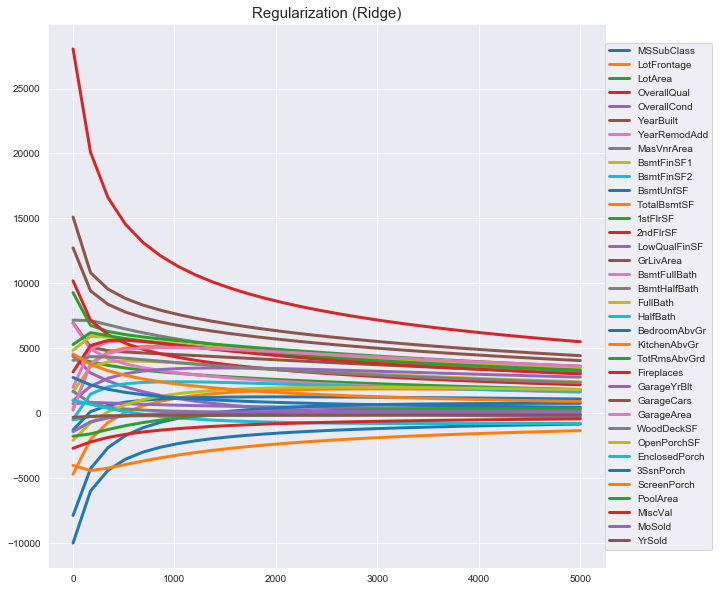

In [36]:
# Visualize the alphas vs coefficients trend (as we increase alpha, we increase regularization strength, forcing
# the variable coefficients closer to zero).

alphas_list = np.linspace(1,5000, 30)
coefs_list = []
for i in alphas_list:
    model = Ridge(alpha = i)
    model.fit(X_train_scaled, y_train)
    coefs_list.append(model.coef_)
    
plt.figure(figsize = (10,10))
plt.plot(alphas_list, coefs_list, lw = '3')
plt.title("Regularization (Ridge)", fontsize = 15)
plt.legend(X.columns, loc='right', bbox_to_anchor= (1.2, 0.5));

In [37]:
lasso.fit(X_train_scaled, y_train)

LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100, 300, 500, 700, 1000, 10000, 100000],
    copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [38]:
lasso.alpha_

1000.0

In [39]:
lasso_train_r2 = lasso.score(X_train_scaled, y_train)
lasso_test_r2  = lasso.score(X_test_scaled, y_test)

print("LASSO Results\n Training R^2: {} \n Test R^2    : {}\n".format(round(lasso_train_r2,2),round(lasso_test_r2,2)))

lasso_train_pred = lasso.predict(X_train_scaled)
lasso_test_pred = lasso.predict(X_test_scaled)

print("LASSO Train RMSE:", round(np.sqrt(mean_squared_error(y_train, lasso_train_pred))) )     
print("LASSO Test RMSE:", round(np.sqrt(mean_squared_error(y_test, lasso_test_pred))))

LASSO Results
 Training R^2: 0.8 
 Test R^2    : 0.8

LASSO Train RMSE: 37984.0
LASSO Test RMSE: 33943.0


In [40]:
# Note how LASSO reduced many of the less important variables to 0 since we are using a large alpha
# (which is higher regularization strength)
pd.DataFrame(data = {
    "features" : X.columns,
    "coefs"    : lasso.coef_
}).sort_values(by = 'coefs', ascending = False)

,features,coefs
3,OverallQual,29637.995284
15,GrLivArea,24925.551267
25,GarageCars,13311.680611
7,MasVnrArea,6946.058712
16,BsmtFullBath,5400.974793
5,YearBuilt,4520.531996
27,WoodDeckSF,3841.933439
6,YearRemodAdd,3673.825999
8,BsmtFinSF1,3505.479100
2,LotArea,3471.537755


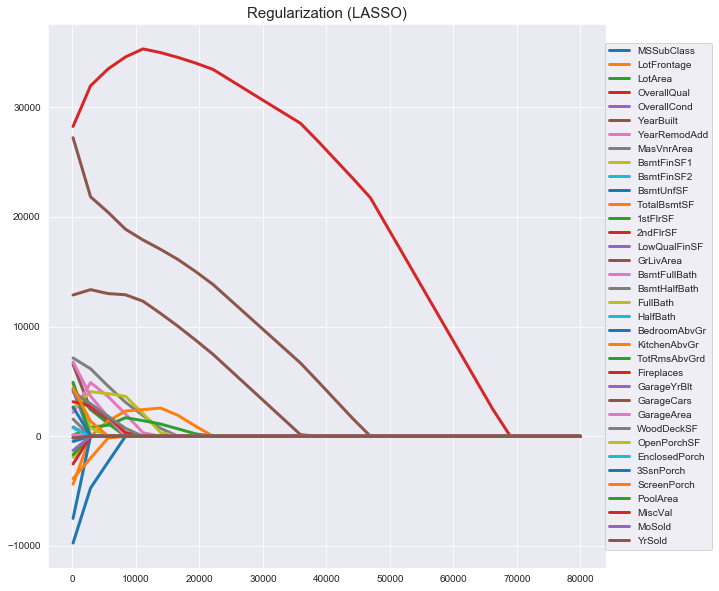

In [41]:
# Visualizing alpha vs coefficients from LASSO to see coeffs get regularized to 0

alphas_list = np.linspace(100,80000, 30)
coefs_list = []
for i in alphas_list:
    model = Lasso(alpha = i)
    model.fit(X_train_scaled, y_train)
    coefs_list.append(model.coef_)
    
plt.figure(figsize = (10,10))
plt.plot(alphas_list, coefs_list, lw = '3')
plt.title("Regularization (LASSO)", fontsize = 15)
plt.legend(X.columns, loc='right', bbox_to_anchor= (1.2, 0.5));

### Part VI. Model Comparison

In [42]:
print("LinReg Results\n Training R^2: {} \n Test R^2    : {}\n".format(
    round(linreg_train_r2,2),round(linreg_test_r2,2)))
print("LinReg Train RMSE:", round(linreg_train_rmse)) 
print("LinReg Test RMSE:", round(linreg_test_rmse))
print("------------------------------\n")
print("Ridge Results\n Training R^2: {} \n Test R^2    : {}\n".format(round(ridge_train_r2,2),round(ridge_test_r2,2)))
print("Ridge Train RMSE:", round(np.sqrt(mean_squared_error(y_train, ridge_train_pred))) )     
print("Ridge Test RMSE:", round(np.sqrt(mean_squared_error(y_test, ridge_test_pred))))
print("------------------------------\n")
print("\nLASSO Results\n Training R^2: {} \n Test R^2    : {}\n".format(round(lasso_train_r2,2),round(lasso_test_r2,2)))
print("LASSO Train RMSE:", round(np.sqrt(mean_squared_error(y_train, lasso_train_pred))) )     
print("LASSO Test RMSE:", round(np.sqrt(mean_squared_error(y_test, lasso_test_pred))))
print("------------------------------")

LinReg Results
 Training R^2: 0.76 
 Test R^2    : 0.75

LinReg Train RMSE: 39456.0
LinReg Test RMSE: 37313.0
------------------------------

Ridge Results
 Training R^2: 0.79 
 Test R^2    : 0.81

Ridge Train RMSE: 39065.0
Ridge Test RMSE: 33748.0
------------------------------


LASSO Results
 Training R^2: 0.8 
 Test R^2    : 0.8

LASSO Train RMSE: 37984.0
LASSO Test RMSE: 33943.0
------------------------------


* What does this mean?
    - Our "naiive" LinReg approach did surprisingly well with only a few highly correlated variables
    - Ridge had the lowest RMSE on the test set, but somewhat underfit (testing set performance is better than the training set, typically "overfit" is common where the training score is higher that the test)
    - Overall, implementing regularization improved over standard LinReg
        - Would this change with what random_state we use?  How much of this is due to sampling?
        - Cross Validation can help reduce this effect (we'll learn this later in the course!)

### Part V. Summary
* Linear models are great for simple prototypes and beginning to understand the linear trends in your data.


#### PROS

+ Simple, easy to implement, low computational cost.
+ Interpretable as simply "y = mx + b" type equation
+ Regularization can fine tune a regression model and help determine which variables are best for predicting Y.
+ Can be compared alongside along non-linear models to really understand a data set (ie KNN, Decision Trees, SVM).

### CONS
- Requires a _linear relationship_ between your data and target variable to work
    - in real life, not all things are linear! (But, try looking into Sklearn's polynomial features tool!)
- Not as much tunability as other mo

In [52]:
# Bonus! Model Persistence

## You can save your models using joblib!
# https://scikit-learn.org/stable/modules/model_persistence.html

from joblib import dump, load
dump(lasso,  './models/lasso.joblib')
dump(ridge,  './models/ridge.joblib')
dump(linreg, './models/linreg.joblib')

# Can load using:

loaded_lasso = load('./models/lasso.joblib')
print(loaded_lasso)
print("\nUsing the laoded model to generate predictions:\n", loaded_lasso.predict(X_train_scaled)[:10])

LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100, 300, 500, 700, 1000, 10000, 100000],
    copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

Using the laoded model to generate predictions:
 [107231.78914981  75424.2891145  229396.11508393 345166.17726314
 214439.52892281 114608.5744966  126833.3922332  195347.59723819
 236441.0571431  117298.47570905]
